Potential Field Method

In [181]:
import numpy as np
import matplotlib.pyplot as plt


from potential_field_method import PotentialFieldMethod, HazardSource, Road

## Scenario

In [182]:
# create pfm object
pfm = PotentialFieldMethod()
pfm.set_position(0,0, v=14) #set ego position (speed is in m/s)

#create lane
lane_x = np.linspace(0, 100, 50)
# lane_y = 0.005*lane_x**2
lane_y = np.zeros_like(lane_x)
pfm.append_lane(lane_x, lane_y)

# lane_x = np.linspace(0, 100, 50)
# # lane_y = 0.005*lane_x**2
# lane_y = np.zeros_like(lane_x) - 3.5
# pfm.append_lane(lane_x, lane_y)

#create obstacle
ob1 = HazardSource()
# ob1.set_position(40, 5.0, yaw=np.pi/6)
ob1.set_position(35, -3.5)
pfm.append_obstacle(ob1)

# ob2 = HazardSource()
# # ob1.set_position(40, 5.0, yaw=np.pi/6)
# ob2.set_position(35 + 80, -3.5)
# pfm.append_obstacle(ob2)

pfm.find_ideal_yawrate()

0.08333333333333326

lets check the risk potential in this scenario

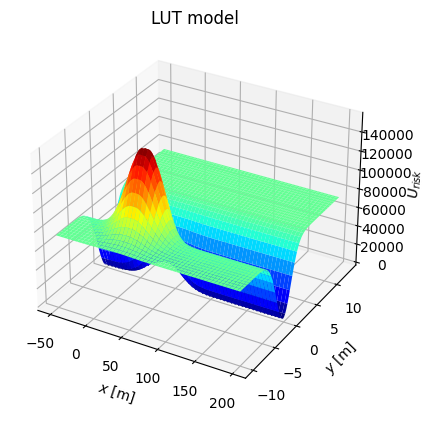

In [183]:
# set plot ranges
X = np.arange(-50, 200, 1)
Y = np.arange(-10, 13.5, 0.25) # np.arange(-7, 7, 0.1)

# save extend before creating meshgird
extent=[X[0],X[-1],Y[0],Y[-1]]
X,Y = np.meshgrid(X,Y)


# get hazard map
Z = pfm.overall_risk_potential(X, Y)

# additional plot settings
kwargs = {
    'cmap': plt.cm.jet,
    'alpha': 1,
}

# plot the actual data
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')

ax1.plot_surface(X, Y, Z, **kwargs)

# add labels
ax1.set_xlabel(r'$x$ [m]')
ax1.set_ylabel(r'$y$ [m]')
ax1.set_zlabel(r'$U_{risk}$')
ax1.set_title("LUT model")

plt.show()

To properly see what is happening, change to a 2d plot

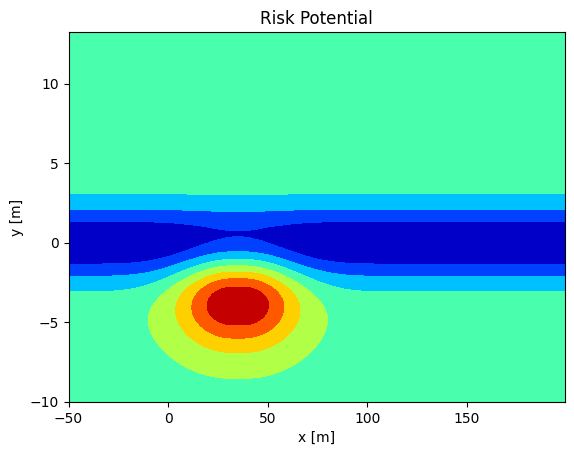

In [184]:
#plot risk potential
plt.contourf(X,Y,Z, **kwargs)#, extent=extent, origin='lower')

#plot ego position
# plt.plot(pfm.x,pfm.y, color = 'white', marker='o')

# trajctory = pfm.predict_position()

# #plot predicted trajectory
# plt.plot(*trajctory, color = 'black', marker='.')

plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.title(f"Risk Potential")
# plt.legend()

plt.show()


predict_position can also be used to do simplified path tracing

In [185]:
# predict position at t seconds in the future

pfm.set_position(0,0)

dt = 0.1
pfm.predict_position(yaw_rate_candidate=-0.5, time = dt)



array([[ 1.39912518],
       [-0.03498542]])

In [186]:
pfm.ideal_yaw_rate

0.08333333333333326

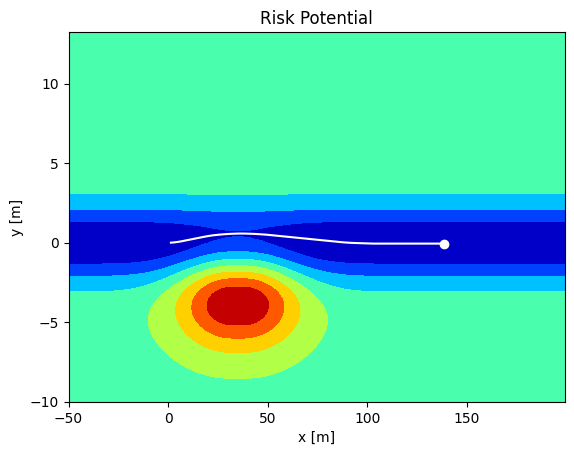

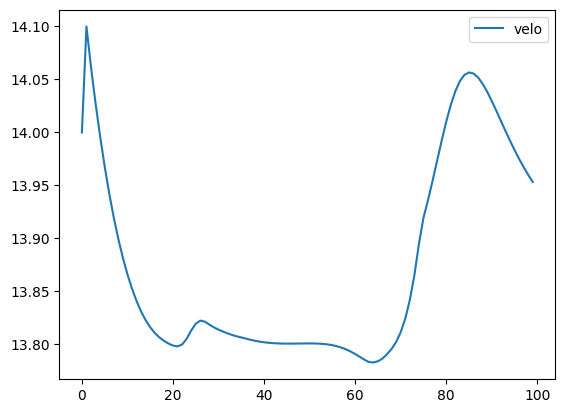

13.947119299533988


In [187]:
x_plot = []
y_plot = []

v_plot = []
pfm.a_max = 1
pfm.p = -0.0
pfm.d = 1



pfm.set_position(0,0, v= 14, yaw = 0.0)
time = np.arange(0, 10, dt)

for t in time:
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    
    
    v_plot.append(pfm.v) 

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)


# #plot risk potential
plt.contourf(X,Y,Z, **kwargs)

#plot ego trajectory position
plt.plot(x_plot, y_plot, color = 'white')
plt.plot(pfm.x,pfm.y, color = 'white', marker='o')


plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.title(f"Risk Potential")
# plt.legend()

plt.show()



# plt.plot(a_plot, label = "accel")
plt.plot(v_plot, label = "velo")

plt.legend()
plt.show()
print(pfm.v)
    

### creating a animated simulation

In [188]:
# create overarching simulation parameters

"""simulation"""
dt = 0.2 # time resolution
t_max = 5 # end time
time = np.arange(0,t_max,dt)
pfm.d = -0.5

pfm = PotentialFieldMethod()

# traffic participant
ob1 = HazardSource()
pfm.append_obstacle(ob1)

#road
# road setup
lane_x = np.linspace(0, 100, 50)
lane_y = np.zeros_like(lane_x)
pfm.append_lane(lane_x, lane_y)

position of obstacle is not defined


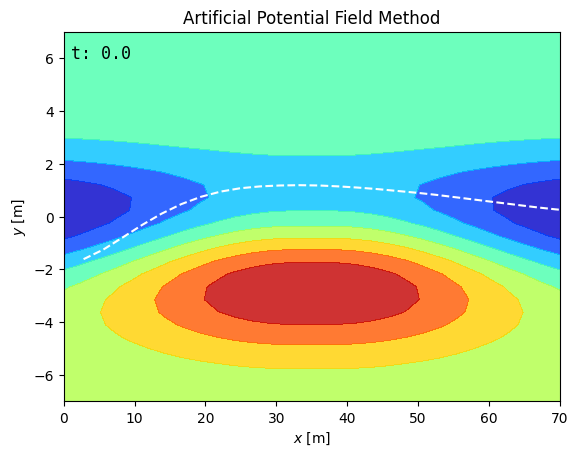

In [189]:
import matplotlib.animation as animation
from IPython.display import HTML




# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, 0)

# empty list to keep track of results
x_plot = []
y_plot = []


"""animation"""
fig, ax = plt.subplots()

# set plot ranges
X = np.linspace(-0, 70, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)

# plot repulsive field as stationary background
ax.contourf(X,Y,Z, cmap=plt.cm.jet, alpha=0.8)

# add animated plot elements  
ego_path = ax.plot([], [], '--', color = 'white')[0]
prediction = ax.plot([],[], color = 'black')[0]
timestamp = ax.text(1,6,s=f"{0.0:.1f}", fontfamily='monospace', fontsize='large')


def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)
        
    ego_path.set_xdata(x_plot)
    ego_path.set_ydata(y_plot)
    
    prediction.set_data(tr)

    timestamp.set_text(f"t: {frame*dt:.1f}")


ax.set_title("Artificial Potential Field Method")
ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$y$ [m]")

#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000)

HTML(ani.to_jshtml())

### Adding a speed plot to the animation

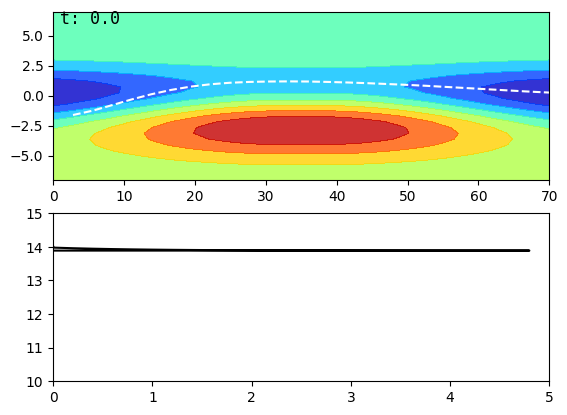

In [190]:
import matplotlib.animation as animation
from IPython.display import HTML


# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, 0)

# empty list to keep track of results
t_plot = []
x_plot = []
y_plot = []
v_plot = []


"""animation"""
fig, (ax1, ax2) = plt.subplots(2,1)

# set plot ranges
X = np.linspace(-0, 70, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)

# plot repulsive field as stationary background
ax1.contourf(X,Y,Z, cmap=plt.cm.jet, alpha=0.8)

# add animated plot elements  
ego_path = ax1.plot([], [], '--', color = 'white')[0]
prediction = ax1.plot([],[], color = 'black')[0]
timestamp = ax1.text(1,6,s=f"{0.0:.1f}", fontfamily='monospace', fontsize='large')

speed = ax2.plot([], [], color='black')[0]

ax2.set_ylim(10, 15)
ax2.set_xlim(0, 5)

def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    
    
    v_plot.append(pfm.v)
    t_plot.append(frame*dt)

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)
        
    ego_path.set_xdata(x_plot)
    ego_path.set_ydata(y_plot)
    
    prediction.set_data(tr)

    timestamp.set_text(f"t: {frame*dt:.1f}")
    speed.set_data(t_plot, v_plot)


#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000)

HTML(ani.to_jshtml())

transient behaviour from the perspective of the ego vehicle

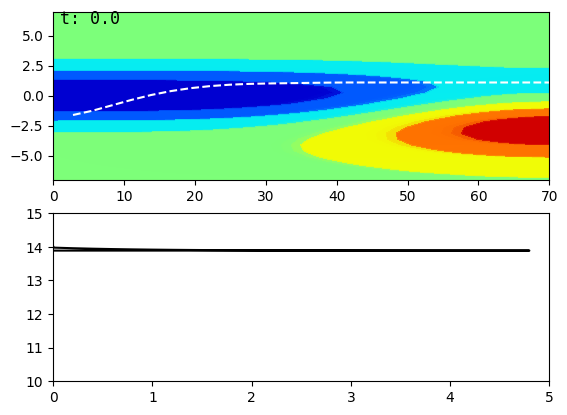

In [191]:
import matplotlib.animation as animation
from IPython.display import HTML


# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, v=7)

# empty list to keep track of results
t_plot = []
x_plot = []
y_plot = []
v_plot = []


"""animation"""
fig, (ax1, ax2) = plt.subplots(2,1)

# set plot ranges
X = np.linspace(-0, 70, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)

# plot repulsive field as stationary background
kwargs = {
    'cmap': plt.cm.jet, 
    'alpha': 0.8
}
background = ax1.contourf(X,Y,Z, **kwargs)


# add animated plot elements  
ego_path = ax1.plot([], [], '--', color = 'white')[0]
prediction = ax1.plot([],[], color = 'black')[0]
timestamp = ax1.text(1,6,s=f"{0.0:.1f}", fontfamily='monospace', fontsize='large')

speed = ax2.plot([], [], color='black')[0]

ax2.set_ylim(10, 15)
ax2.set_xlim(0, 5)

def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    
    
    v_plot.append(pfm.v)
    t_plot.append(frame*dt)

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)

    Z = pfm.overall_risk_potential(X, Y)
    global background
    background = ax1.contourf(X,Y,Z, **kwargs)
        
    ego_path.set_xdata(x_plot)
    ego_path.set_ydata(y_plot)
    
    prediction.set_data(tr)

    timestamp.set_text(f"t: {frame*dt:.1f}")
    speed.set_data(t_plot, v_plot)


#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000)

HTML(ani.to_jshtml())

differential plot

In [192]:
z_fac_max = []
dt_plot = []

20 frames


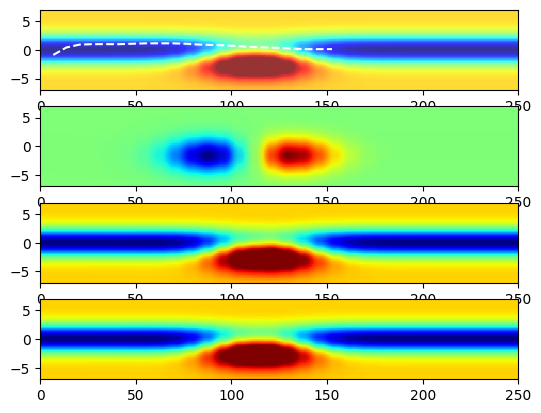

In [199]:
import matplotlib.animation as animation
from IPython.display import HTML

dt = 0.5
dt_plot.append(dt)
t_max = 10

print(int(t_max/dt), 'frames')


# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, v=7)


# empty list to keep track of results
y_plot = []
x_plot = []


"""animation"""
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)


# set plot ranges
X = np.linspace(0, 250, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
extent=[X[0],X[-1],Y[0],Y[-1]]
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)
Z_old = Z

# plot repulsive field as stationary background
kwargs = {
    'cmap': plt.cm.jet, 
    'vmin': 0,
    'vmax': HazardSource.weight*1.2,
    'alpha': 0.8,
    'origin': 'lower',
    'aspect': 3,
    'extent': extent
}
kwargs2 = kwargs.copy()
kwargs2['vmin'] = None
kwargs2['vmax'] = None

background1 = ax1.imshow(Z, **kwargs)
background2 = ax2.imshow(Z, **kwargs2)
background3 = ax3.imshow(Z, **kwargs)
background4 = ax4.imshow(Z, **kwargs)


ego_path = ax1.plot([], [], '--', color = 'white')[0]


zfac = []
def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)


    Z_new = pfm.overall_risk_potential(X, Y)

    global background1, background2, background3, background4, Z, Z_adjusted, zfac

    try:
        background4 = ax4.imshow(Z_adjusted, **kwargs)
    except:
        pass


    background1.set_data(Z_new)
    Z_factor = (Z_new-Z)/dt
    background2 = ax2.imshow(Z_factor, **kwargs2)
    Z_adjusted = Z_new+Z_factor
    background3 = ax3.imshow(Z_adjusted, **kwargs)
    
    Z = Z_new

    
    ego_path.set_xdata(x_plot)
    ego_path.set_ydata(y_plot)    

    timestamp.set_text(f"t: {frame*dt:.1f}")
    

#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000, )

HTML(ani.to_jshtml())

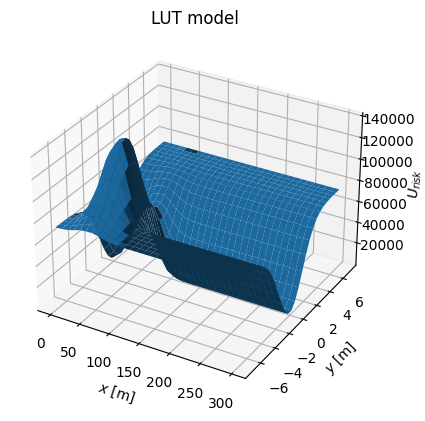

In [ ]:
# plot the actual data
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')

ax1.plot_surface(X, Y, Z_adjusted)

# add labels
ax1.set_xlabel(r'$x$ [m]')
ax1.set_ylabel(r'$y$ [m]')
ax1.set_zlabel(r'$U_{risk}$')
ax1.set_title("LUT model")

plt.show()

20 frames


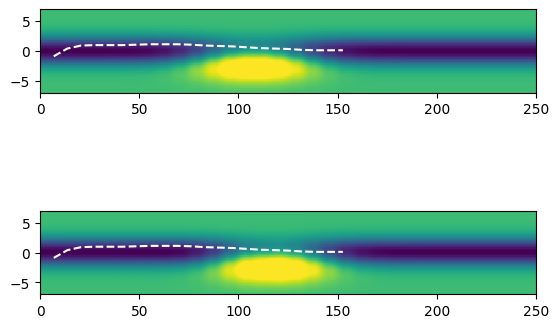

In [260]:
import matplotlib.animation as animation
from IPython.display import HTML

dt = 0.5
dt_plot.append(dt)
t_max = 10

print(int(t_max/dt), 'frames')


# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, v=7)


# empty list to keep track of results
y_plot = []
x_plot = []


"""animation"""
# plot the actual data
fig, axes = plt.subplots(2,1)


# set plot ranges
X = np.linspace(0, 250, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
extent=[X[0],X[-1],Y[0],Y[-1]]
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)
Z_adjusted = Z

# plot repulsive field as stationary background
kwargs = {
    # 'cmap': plt.cm.jet, 
    'vmin': 0,
    'vmax': HazardSource.weight*1.2,
    'alpha': 0.8,
    'origin': 'lower',
    'aspect': 3,
    'extent': extent
}
kwargs2 = kwargs.copy()
kwargs2['vmin'] = None
kwargs2['vmax'] = None

backgrounds = [ax.imshow(Z, **kwargs) for ax in axes]
ego_paths = [ax.plot([], [], '--', color = 'white')[0] for ax in axes]


zfac = []
def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)


    Z_new = pfm.overall_risk_potential(X, Y)

    global Z, Z_adjusted

    #update upper image
    backgrounds[0] = axes[0].imshow(Z, **kwargs)

    #update lower image
    Z_factor = (Z_new-Z)/dt
    Z_adjusted = Z_new+Z_factor
    backgrounds[1] = axes[1].imshow(Z_adjusted, **kwargs)

    
    Z = Z_new

    for plot in ego_paths:
        plot.set_xdata(x_plot)
        plot.set_ydata(y_plot)    

    timestamp.set_text(f"t: {frame*dt:.1f}")
    

#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000, )

HTML(ani.to_jshtml())

20 frames


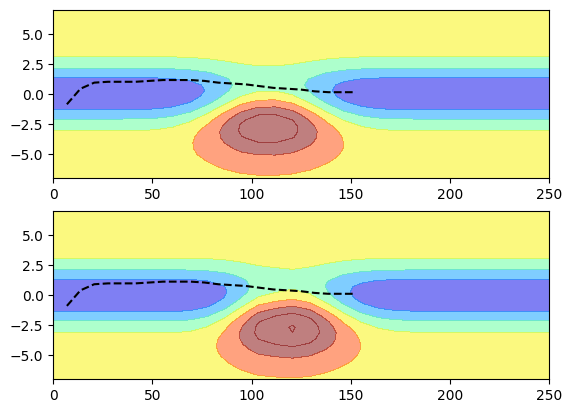

In [264]:
import matplotlib.animation as animation
from IPython.display import HTML

dt = 0.5
dt_plot.append(dt)
t_max = 10

print(int(t_max/dt), 'frames')


# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, v=7)


# empty list to keep track of results
y_plot = []
x_plot = []


"""animation"""
# plot the actual data
fig, axes = plt.subplots(2,1)


# set plot ranges
X = np.linspace(0, 250, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
extent=[X[0],X[-1],Y[0],Y[-1]]
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)
Z_adjusted = Z

# plot repulsive field as stationary background
kwargs = {
    'cmap': plt.cm.jet, 
    'vmin': 0,
    'vmax': HazardSource.weight*1.2,
    'alpha': 0.5,
    # 'origin': 'lower',
    # 'aspect': 3,
    # 'extent': extent
}
kwargs2 = kwargs.copy()
kwargs2['vmin'] = None
kwargs2['vmax'] = None

backgrounds = [ax.contourf(X,Y,Z, **kwargs) for ax in axes]
ego_paths = [ax.plot([], [], '--', color = 'black')[0] for ax in axes]


zfac = []
def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)


    Z_new = pfm.overall_risk_potential(X, Y)

    global Z, Z_adjusted

    #update upper image
    backgrounds[0].remove()
    backgrounds[0] = axes[0].contourf(X,Y,Z, **kwargs)

    #update lower image
    Z_factor = (Z_new-Z)/dt
    Z_adjusted = Z_new+Z_factor
    backgrounds[1].remove()
    backgrounds[1] = axes[1].contourf(X,Y,Z_adjusted, **kwargs)

    
    Z = Z_new

    for plot in ego_paths:
        plot.set_xdata(x_plot)
        plot.set_ydata(y_plot)    

    timestamp.set_text(f"t: {frame*dt:.1f}")
    

#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000, )

HTML(ani.to_jshtml())

fixed ego view plot (WIP)


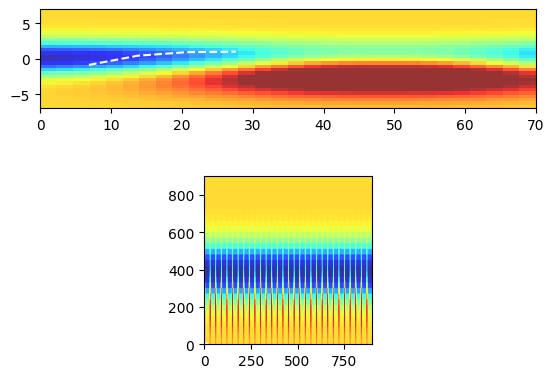

In [ ]:

import matplotlib.animation as animation
from IPython.display import HTML


# setup of car states
pfm.set_position(0,-1.75, 0, 14) #set ego position (speed is in m/s)
ob1.set_position(35, -1.75, 0, v=7)


# empty list to keep track of results
y_plot = []
x_plot = []


"""animation"""
fig, (ax1, ax2) = plt.subplots(2,1)

# set plot ranges
X_local = np.linspace(-20, 50, 60)
Y_local = np.linspace(-15, 15, 30) # np.arange(-7, 7, 0.1)

extent_local=[X_local[0],X_local[-1],Y_local[0],Y_local[-1]]
X_local,Y_local = np.meshgrid(X,Y)

# set plot ranges
X = np.linspace(-0, 70, 30)
Y = np.linspace(-7, 7, 30) # np.arange(-7, 7, 0.1)
extent=[X[0],X[-1],Y[0],Y[-1]]
X,Y = np.meshgrid(X,Y)

# get hazard map
Z = pfm.overall_risk_potential(X, Y)

# plot repulsive field as stationary background
kwargs = {
    'cmap': plt.cm.jet, 
    'vmin': 0,
    'vmax': HazardSource.weight*1.2,
    'alpha': 0.8,
    'aspect': 1,
    'origin': 'lower'
}
background1 = ax1.imshow(Z, extent=extent, **kwargs)
background2 = ax2.imshow(np.zeros_like(Y_local), **kwargs)#, extent=extent_local


ego_path = ax1.plot([], [], '--', color = 'white')[0]

ax2.plot([0],[0], marker = ">", color = 'white')


def update(frame):
    #prediction step
    yr = pfm.find_ideal_yawrate()
    tr = pfm.predict_position()
    

    #update ego position
    pfm.update(dt)

    # append to plot lists
    x_plot.append(pfm.x)
    y_plot.append(pfm.y)


    # create local coordinates system
    X_global = X_local + pfm.x#*np.cos(pfm.yaw) + (Y_local)*np.sin(-pfm.yaw)
    Y_global = Y_local + pfm.y#*np.cos(pfm.yaw) + (X_local)*np.sin(pfm.yaw)
    # X_local = X + pfm.x
    # Y_local = Y

    Z_local = pfm.overall_risk_potential(X_global, Y_global)
    Z = pfm.overall_risk_potential(X, Y)

    global background1, background2
    background1.set_data(Z)
    background2.set_data(Z_local)

    # ego_pos.set_data([0], [pfm.y])

    ego_path.set_xdata(x_plot)
    ego_path.set_ydata(y_plot)    

    timestamp.set_text(f"t: {frame*dt:.1f}")
    speed.set_data(t_plot, v_plot)


#create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=int(t_max/dt), interval=dt*1000)

HTML(ani.to_jshtml())